Konfiguracja

In [1]:
from tools import *

In [2]:
import math
from random import randint,uniform,random
from time import time
from operator import attrgetter
from functools import cmp_to_key

In [3]:
class Point:
    def __init__(self, a, e = 10**-10):
        self.x = a[0]
        self.y = a[1]
        self.e = e
    
    def distance(self,a):
        return (self.x - a.x)**2 + (self.y - a.y)**2
    
    def det(self,a,b):
        d = self.x*a.y + self.y*b.x + a.x*b.y - b.x*a.y - self.y*a.x - self.x*b.y
        
        if d < -self.e:
            return 1
        elif d > self.e:
            return -1
        else:
            return 0
        
    def __repr__(self):
        return "("+str(round (self.x, 3)) + ", " + str(round(self.y, 3)) +")"
    
def toPoints(d, e = 10**-12):
    return[Point(d[i], e) for i in range(len(d))]
def toTuples(p):
    return[(p[i].x, p[i].y) for i in range(len(p))]

def saveToFile(data, fileName):
    with open(fileName, "w") as fp:
            js.dump(data, fp)

def savePointsToFile(points, fileName):
    data = toTuples(points)
    saveToFile(data, fileName)

Generowanie zbiorów

In [4]:
def aDataset(cords = (-100,100), n = 100, save = True, name = "a"):
#     100 losowo wygenerowanych punktów o współrzędnych z przedziału
#         [-100, 100]
    d = [(uniform(cords[0], cords[1]), uniform(cords[0], cords[1])) for _ in range(n)]
    
    if save:
        with open(name + ".txt", "w") as fp:
            js.dump(d, fp)
        
    return d

In [5]:
def bDataset(n = 100, r = 10, p = (0.0,0.0), save = True, name = "b"):
#     100 losowo wygenerowanych punktów leżących na okręgu o środku
# (0,0) i promieniu R=10
    d = [None] * n
    
    for i in range(n):
        alpha = random() * (2*math.pi)
        d[i] = (p[0] + r*math.sin(alpha), p[1] + r*math.cos(alpha))
    
    if save:
        with open(name + ".txt", "w") as fp:
            js.dump(d, fp)
    
    return d

In [6]:
def cDataset(n = 100, ll = (-10, -10), ur = (10,10), lr = (10,-10), ul = (-10,10), save = True, name = "c"):
#     zawierający 100 losowo wygenerowanych punktów leżących na bokach prostokąta
# o wierzchołkach (-10, 10), (-10,-10), (10,-10), (10,10)
    v1 = (ll[0] - ul[0], ll[1] - ul[1])
    v2 = (ll[0] - lr[0], ll[1] - lr[1])
    v3 = (ur[0] - ul[0], ur[1] - ul[1])
    v4 = (ur[0] - lr[0], ur[1] - lr[1])
    
    d = [None] * n
    
    for i in range(n):
        s = randint(1,4)
        k = random()
        
        if s == 1:
            d[i] = (ll[0] - v1[0]*k, ll[1] - v1[1]*k)
        elif s == 2:
            d[i] = (ll[0] - v2[0]*k, ll[1] - v2[1]*k)
        elif s == 3:
            d[i] = (ur[0] - v3[0]*k, ur[1] - v3[1]*k)
        else:
            d[i] = (ur[0] - v4[0]*k, ur[1] - v4[1]*k)
    
    if save:
        with open(name + ".txt", "w") as fp:
            js.dump(d, fp)
    return d


In [7]:
def dDataset(ll = (0,0), ur = (10,10), n1 = 25, n2 = 20, save = True, name = "d"):
    # wierzchołki kwadratu (0, 0), (10, 0), (10, 10), (0, 10) oraz punkty
# wygenerowane losowo w sposób następujący: po 25 punktów na dwóch bokach
# kwadratu leżących na osiach i po 20 punktów na przekątnych kwadratu.   
    v1 = (ll[0] - ur[0], ll[1] - ur[1])
    v2 = (ll[0] - ur[0], ur[1] - ll[1] )
    

    d = [None] * (n1*2 + n2*2 + 4)
    d[0] = ll
    d[1] = ur
    d[2] = (ll[0],ur[1])
    d[3] = (ur[0],ll[1])
    
    k = 4
    for i in range(n1):
        d[i+k] = (ll[0],uniform(ll[1],ur[1]))
        d[i + k + n1] = (uniform(ll[0],ur[0]), ll[1])
    k += 2*n1

    for i in range(n2):
        p = random()
        d[i+k] = (ur[0] + v1[0]*p, ur[1] + v1[1]*p)
        p = random()
        d[i + k + n2] = (ll[0] - v2[0]*p, ur[1] - v2[1]*p)

    if save:
        with open(name + ".txt", "w") as fp:
            js.dump(d, fp)
    return d



In [8]:
from pathlib import Path
def gen(name):
    name = str(name)
    if name == "a":
        return aDataset()
    elif name == "b":
        return bDataset()
    elif name == "c":
        return cDataset()
    elif name == "d":
        return dDataset()
    
    elif name == "am":
        k = 5
        return aDataset(cords = (-10**k, 10**k), n=k*100, name = name)
    elif name == "bm":
        return bDataset(n = 100, r = 1000, p= (10,10), name = name)
    elif name == "cm":
        k = 500
        return cDataset(n=250, ll = (-k,-k), ur = (k,k), lr = (k,-k), ul = (-k,k), name = name)
    elif name == "dm":
        k = 500
        return dDataset(ll = (-k,-k), ur = (k, k), n1 = 100, n2 = 100, name = name)
    
    elif name == "AA":
        return aDataset(cords = (-10**6, 10**6), n=500000, name = name)
    elif name == "BB":
        return bDataset(n=5000, r = 1000, name = name)
    elif name == "CC":
        k = 5000
        return cDataset(n=200000, ll = (-k,-k), ur = (k,k), lr = (k,-k), ul = (-k,k), name = name)
    elif name == "DD":
        k = 5000
        return dDataset(ur = (k, k), n1 = 100000, n2 = 100000, name = name)
    

def load(reset = False):
    files = ["a","b","c","d","am","bm","cm","dm", "AA", "BB", "CC", "DD"]
    loaded = []
    for name in files:
        file = Path(str(name) + ".txt")

        if file.is_file() and reset is False:
            with open(file, "r") as fp:
                loaded.append(js.load(fp))
        else:
            loaded.append(gen(name))
    return loaded
# a,b,c,d,am,bm,cm,dm,A,B,C,D = load(reset=True)
a,b,c,d,am,bm,cm,dm,A,B,C,D = load()

In [9]:
def plotDataset(d): #zeby dzialaly przyciski trzeba wywolac ten kod w komorce, a nie funkcje
    %matplotlib notebook
    plot = Plot(points =[PointsCollection(d)])
    plot.draw()

Wizualizacja graficzna zbiorów

<IPython.core.display.Javascript object>


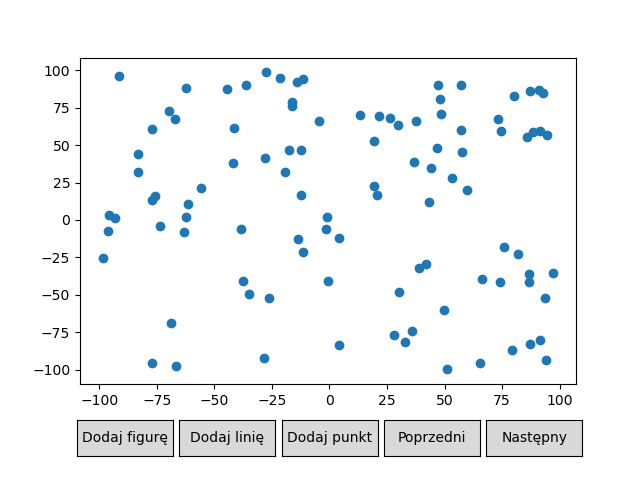

In [10]:
plotDataset(a)

<IPython.core.display.Javascript object>


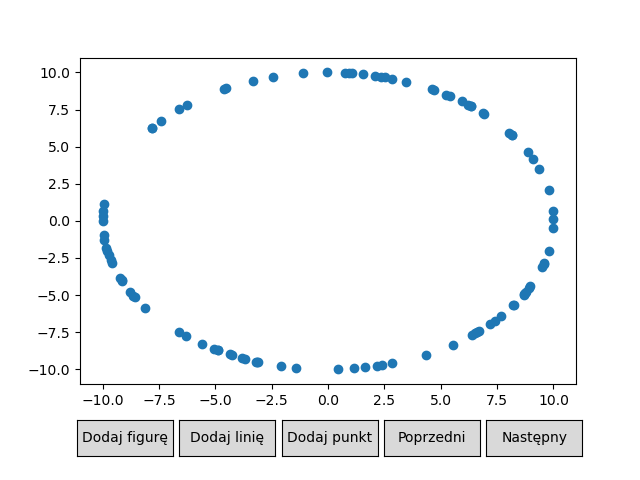

In [11]:
plotDataset(b)

<IPython.core.display.Javascript object>


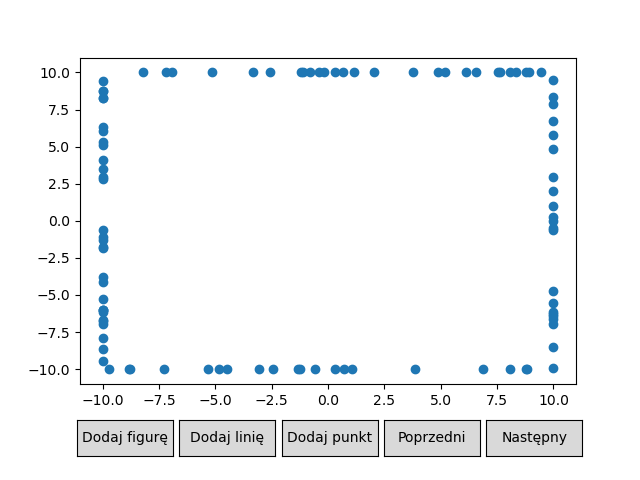

In [12]:
plotDataset(c)

<IPython.core.display.Javascript object>


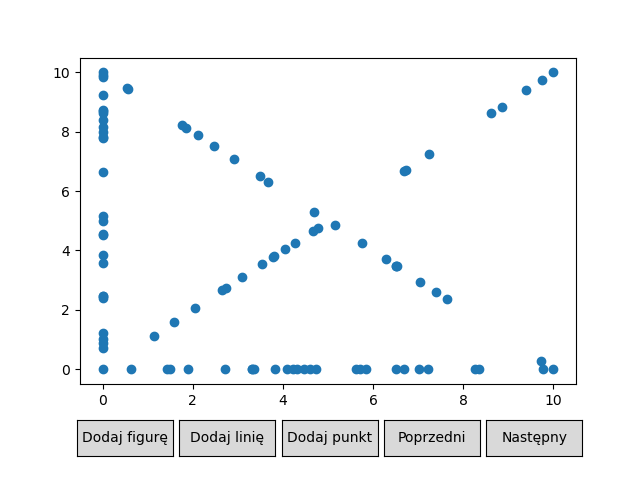

In [13]:
plotDataset(d)

Sortowanie punktów

In [14]:
def findStart(dataset):
    res = min(dataset, key = attrgetter('y','x'))
    return res

def sortt(dataset, s):
    def compare(a,b):
        dett = a.det(s,b)

        if dett < 0:
            return 1
        if dett > 0:
            return -1
        
        if s.distance(a) > s.distance(b):
            return -1
        if s.distance(a) < s.distance(b):
            return 1

        return 0
    idx = dataset.index(s)
    del dataset[idx]
    return [s] + sorted(dataset, key = cmp_to_key(compare))


<IPython.core.display.Javascript object>


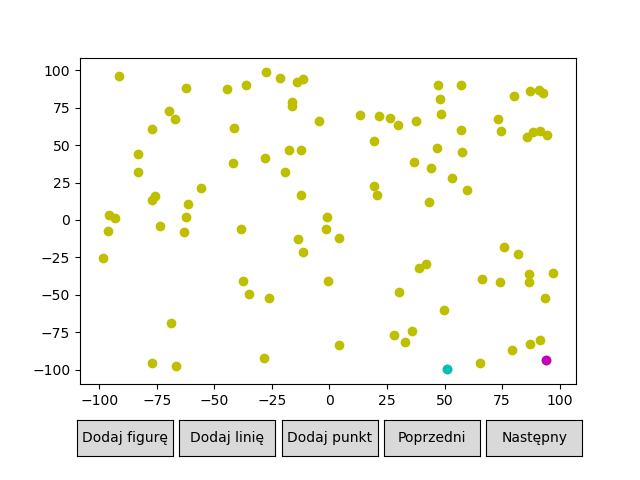

In [15]:
# wizualizacja sortowania
points = toPoints(a)

s = findStart(points)

pointsSet = sortt(points, s)
p = toTuples(pointsSet)

scenes=[Scene([PointsCollection(p, color = 'y'),
               PointsCollection([p[i]], color = 'm'), 
               PointsCollection([p[0]], color = 'c')]) for i in range(1, len(p))]

plot = Plot(scenes)
plot.draw()      

Algorytm Grahama

In [16]:
def reduce(pointsSet, s):
    def compare(a,b):
        dett = a.det(s,b)

        if dett < 0:
            return 1
        if dett > 0:
            return -1
        return 0
    
    res = [pointsSet[0]]
    i = 1
    while i < len(pointsSet):
        res.append(pointsSet[i])
        k = i
        while i < len(pointsSet) - 1 and compare(pointsSet[i], pointsSet[i+1]) == 0:
            i += 1
        if k != i:
            res.append(pointsSet[i])
        i += 1
    return res

In [17]:
def Graham(dataset, e = 10**-10, visualize = True):
    startTime = time()
    points = toPoints(dataset, e = e)
    s = findStart(points)
    pointsSet = reduce(sortt(points, s) , s)
    stack = [pointsSet[i] for i in range(3)]
    
    i = 3
    
    scenes = [Scene([PointsCollection(dataset, color = 'orange')])]
    while i < len(pointsSet):
        t = len(stack) - 1
        
        if visualize:
            hull = []
            for k in range(1,len(stack)):
                hull.append([(stack[k].x, stack[k].y),(stack[k -1].x, stack[k-1].y)] )
                scenes.append(Scene(
                [PointsCollection(dataset, color = 'orange'),
                PointsCollection(toTuples(stack), color = 'red'),
                PointsCollection(toTuples([pointsSet[i], stack[t-1], stack[t]]), color = 'cyan'),
                PointsCollection(toTuples([pointsSet[i]]), color = 'purple')],
                [LinesCollection(hull, color = 'red')]
            ))

        
    
        if pointsSet[i].det(stack[t-1], stack[t]) < 0:
            stack.append(pointsSet[i])
            i += 1
        else:
            stack.pop()
            
    hull = []
    for i in range(len(stack)):
        hull.append([(stack[i].x, stack[i].y),(stack[i -1].x, stack[i-1].y)] )
    
    scenes.append(Scene(
        [PointsCollection(dataset, color = 'orange'),
        PointsCollection(toTuples(stack), color = 'red')],
        [LinesCollection(hull, color = 'red')]
    ))

    endTime = time()
    return stack, scenes[::-1], endTime - startTime

Algorytm Jarvisa

In [18]:
def findNext(dataset, deleted, s):
    def compare(a,b):
        dett = a.det(s,b)

        if dett < 0:
            return 1
        if dett > 0:
            return -1
        return 0    
    
    
    ind = deleted.index(False)
    res = dataset[ind]
    
    for i in range(len(dataset)):
        if deleted[i] is False:
            if compare(res, dataset[i]) > 0:
                res = dataset[i]
                ind = i
    return res, ind
         

In [19]:
def Jarvis(dataset, e = 10**-10, visualize = True):
    startTime = time()
    points = toPoints(dataset, e = e)
    deleted = [False for _ in range(len(points))]
    
    s = findStart(points)
    ind = points.index(s)

    deleted[ind] = True
    
    res = [s]
    s, i = findNext(points, deleted, s)
    
    count = 2
    
    scenes = [Scene([PointsCollection(toTuples(points), color = 'orange')])]
    deleted[ind] = False
    while i != ind and count < len(dataset):
        deleted[i] = True
        res.append(s)
        
        if visualize:
            hull = []
            for k in range(1,len(res)):
                hull.append([(res[k].x, res[k].y),(res[k -1].x, res[k-1].y)] )
            scenes.append(
            Scene([
                   PointsCollection(toTuples(points), color = 'orange'),
                   PointsCollection(toTuples(res), color = 'red'),
                   PointsCollection(toTuples([res[-1]]), color = 'cyan' )],
                   [LinesCollection(hull, color = 'red')]))
        

        s, i = findNext(points, deleted, s)
        count+=1
    
    hull = []
    for i in range(len(res)):
        hull.append([(res[i].x, res[i].y),(res[i -1].x, res[i-1].y)] )
    
    scenes.append(Scene([
        PointsCollection(toTuples(points), color = 'orange'),
        PointsCollection(toTuples(res), color = 'red')],
        [LinesCollection(hull, color = 'red')]
    ))
    endTime = time()
    return res, scenes[::-1], endTime - startTime



Wizualizacja otoczek

In [20]:
times = []
pointsInHull = []

zbiór a

In [21]:
dataset = a
tt = ["a",None, None]
ph = ["a",None, None]

<IPython.core.display.Javascript object>


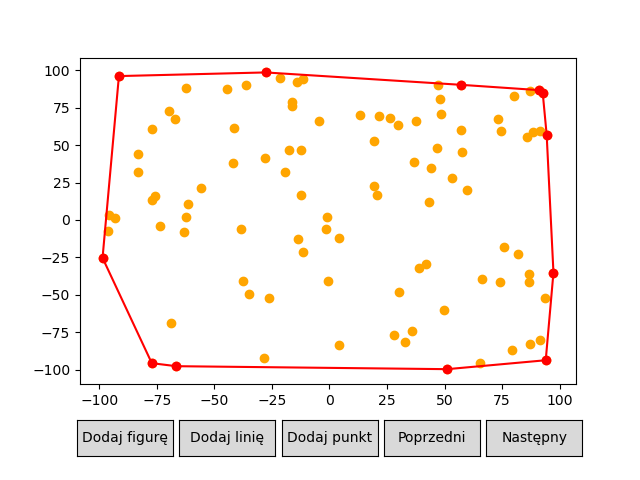

time: 0.10700011253356934 s


In [22]:
%matplotlib notebook
hullPoints, scenes, t = Graham(dataset)
plot = Plot(scenes)
plot.draw()
print("time:",t,"s")
tt[1] = t
ph[1] = len(hullPoints)

<IPython.core.display.Javascript object>


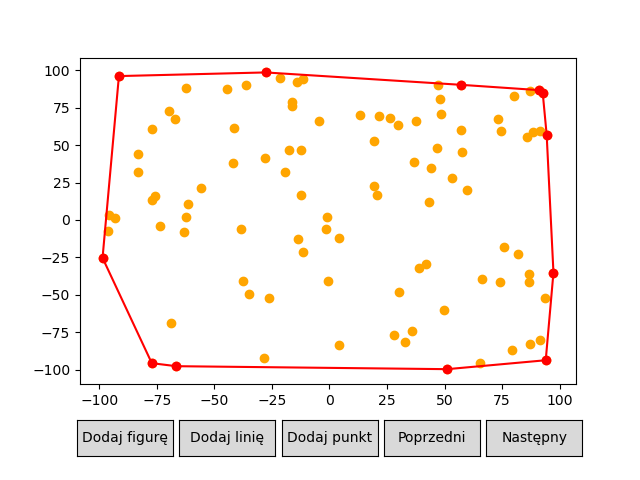

time: 0.0009996891021728516 s


In [23]:
%matplotlib notebook
hullPoints, scenes, t = Jarvis(dataset)
plot = Plot(scenes)
plot.draw()
print("time:",t,"s")
tt[2] = t
times.append(tt)
ph[2] = len(hullPoints)
pointsInHull.append(ph)


zbiór b

In [24]:
dataset = b
tt = ["b",None, None]
ph = ["b",None, None]

<IPython.core.display.Javascript object>


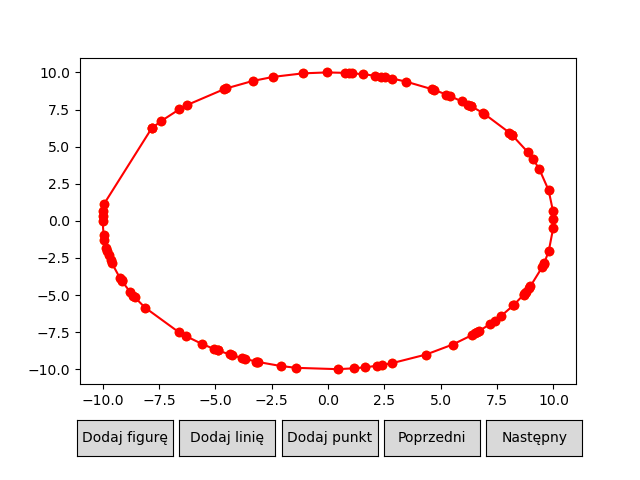

time: 0.08900022506713867 s


In [25]:
%matplotlib notebook
hullPoints, scenes, t = Graham(dataset)
plot = Plot(scenes)
plot.draw()
print("time:",t,"s")
tt[1] = t
ph[1] = len(hullPoints)

<IPython.core.display.Javascript object>


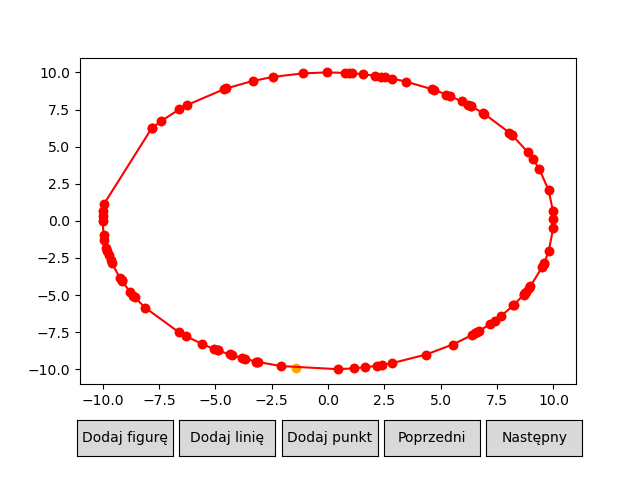

time: 0.010001182556152344 s


In [26]:
%matplotlib notebook
hullPoints, scenes, t = Jarvis(dataset)
plot = Plot(scenes)
plot.draw()
print("time:",t,"s")
tt[2] = t
times.append(tt)
ph[2] = len(hullPoints)
pointsInHull.append(ph)

zbiór c

In [27]:
dataset = c
tt = ["c",None, None]
ph = ["c",None, None]

<IPython.core.display.Javascript object>


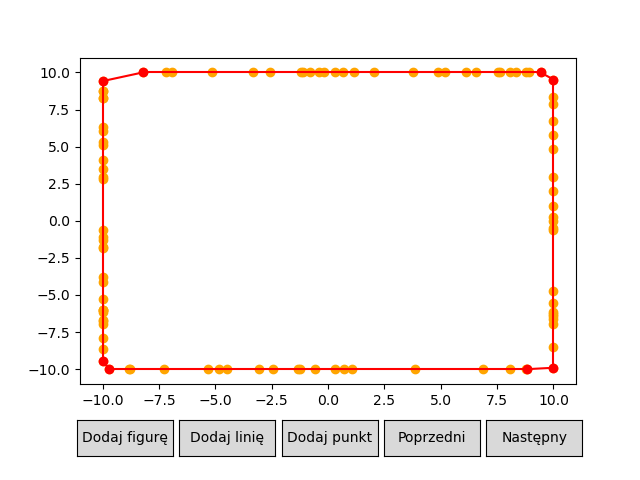

time: 0.007000446319580078 s


In [28]:
%matplotlib notebook
hullPoints, scenes, t = Graham(dataset)
plot = Plot(scenes)
plot.draw()
print("time:",t,"s")
tt[1] = t
ph[1] = len(hullPoints)

<IPython.core.display.Javascript object>


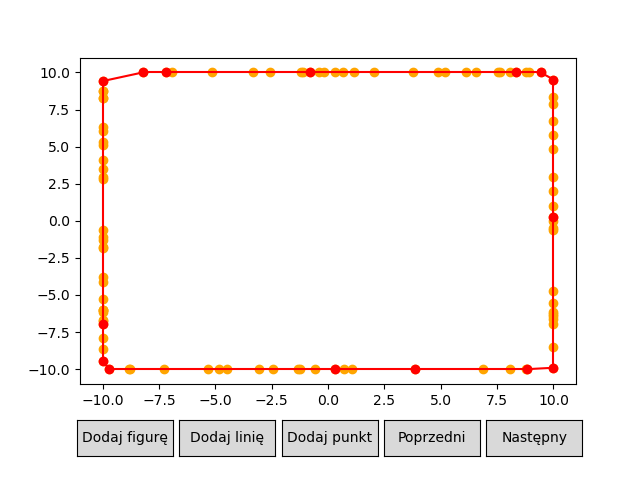

time: 0.0009996891021728516 s


In [29]:
%matplotlib notebook
hullPoints, scenes, t = Jarvis(dataset)
plot = Plot(scenes)
plot.draw()
print("time:",t,"s")
tt[2] = t
times.append(tt)
ph[2] = len(hullPoints)
pointsInHull.append(ph)
    

zbiór d

In [30]:
dataset = d
tt = ["d",None, None]
ph = ["d",None, None]

<IPython.core.display.Javascript object>


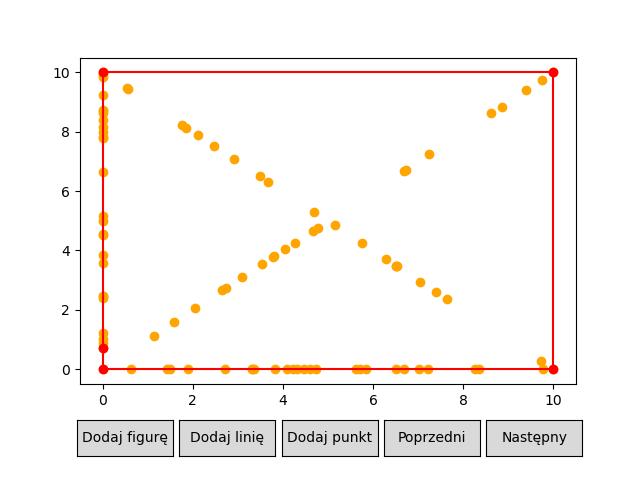

time: 0.001999378204345703 s


In [31]:
%matplotlib notebook
hullPoints, scenes, t = Graham(dataset)
plot = Plot(scenes)
plot.draw()
print("time:",t,"s")
tt[1] = t
ph[1] = len(hullPoints)

<IPython.core.display.Javascript object>


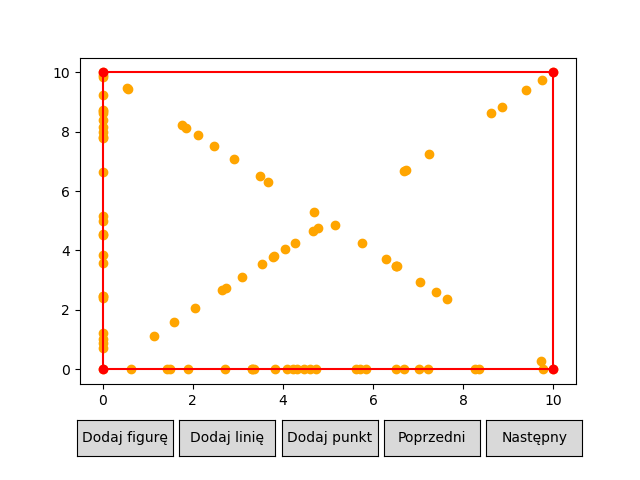

time: 0.0009999275207519531 s


In [32]:
%matplotlib notebook
hullPoints, scenes, t = Jarvis(dataset)
plot = Plot(scenes)
plot.draw()
print("time:",t,"s")
tt[2] = t
times.append(tt)
ph[2] = len(hullPoints)
pointsInHull.append(ph)
    

Wizualizacja otoczek dla zmodyfikowanych zestawów danych

zestaw a, 500 punktow z przedzialu [-10^5, 10^5]

In [33]:
dataset = am
tt = ["am",None, None]
ph = ["am",None, None]

<IPython.core.display.Javascript object>


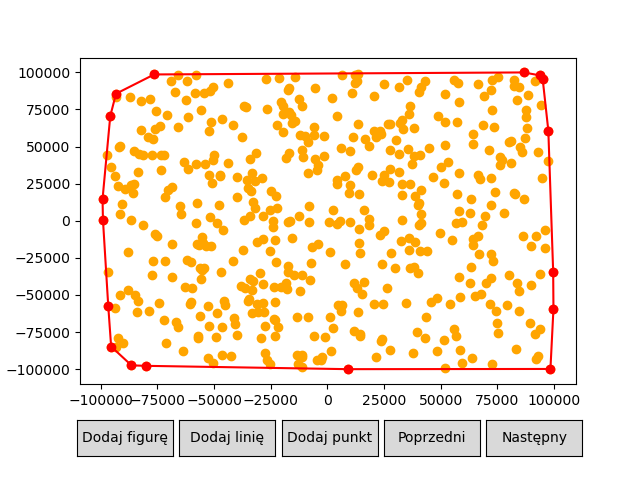

time: 0.20600271224975586 s


In [34]:
%matplotlib notebook
hullPoints, scenes, t = Graham(dataset)
plot = Plot(scenes)
plot.draw()
print("time:",t,"s")
tt[1] = t
ph[1] = len(hullPoints)

<IPython.core.display.Javascript object>


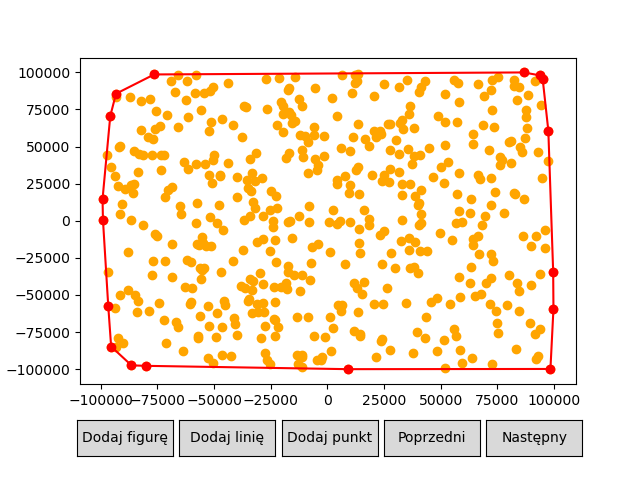

time: 0.007999658584594727 s


In [35]:
%matplotlib notebook
hullPoints, scenes, t = Jarvis(dataset)
plot = Plot(scenes)
plot.draw()
print("time:",t,"s")
tt[2] = t
times.append(tt)
ph[2] = len(hullPoints)
pointsInHull.append(ph)
    

Zbiór b, 100 punktów, promień 1000, środek (10, 10)

In [36]:
dataset = bm
tt = ["bm",None, None]
ph = ["bm",None, None]

<IPython.core.display.Javascript object>


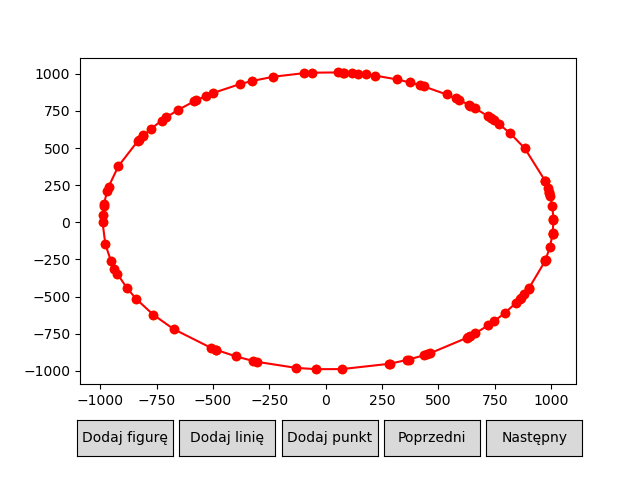

time: 0.08449864387512207 s


In [37]:
%matplotlib notebook
hullPoints, scenes, t = Graham(dataset)
plot = Plot(scenes)
plot.draw()
print("time:",t,"s")
tt[1] = t
ph[1] = len(hullPoints)

<IPython.core.display.Javascript object>


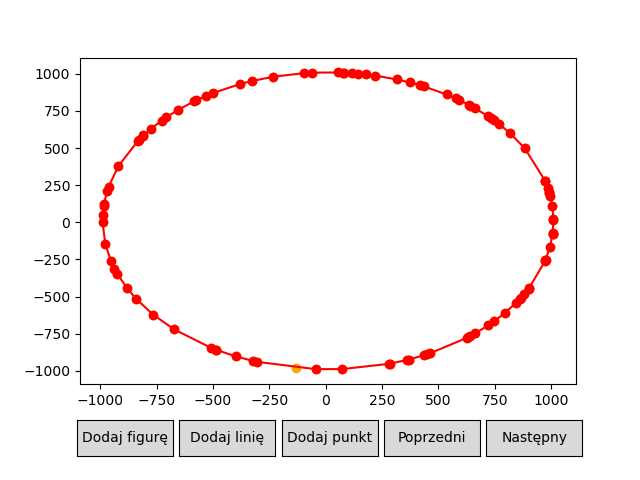

time: 0.011998653411865234 s


In [38]:
%matplotlib notebook
hullPoints, scenes, t = Jarvis(dataset)
plot = Plot(scenes)
plot.draw()
print("time:",t,"s")
tt[2] = t
times.append(tt)
ph[2] = len(hullPoints)
pointsInHull.append(ph)
    

zbiór c, 250 punktów, współrzędne (-500,-500), (500,500), (-500,500), (500,-500)

In [39]:
dataset = cm
tt = ["cm",None, None]
ph = ["cm",None, None]

<IPython.core.display.Javascript object>


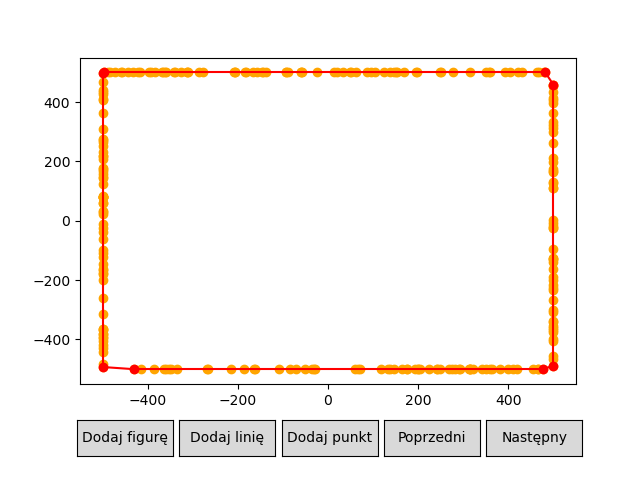

time: 0.014999151229858398 s


In [40]:
%matplotlib notebook
hullPoints, scenes, t = Graham(dataset)
plot = Plot(scenes)
plot.draw()
print("time:",t,"s")
tt[1] = t
ph[1] = len(hullPoints)

<IPython.core.display.Javascript object>


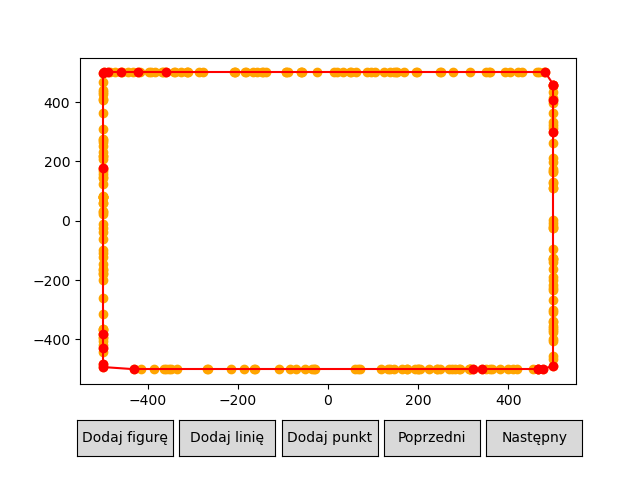

time: 0.0060024261474609375 s


In [41]:
%matplotlib notebook
hullPoints, scenes, t = Jarvis(dataset)
plot = Plot(scenes)
plot.draw()
print("time:",t,"s")
tt[2] = t
times.append(tt)
ph[2] = len(hullPoints)
pointsInHull.append(ph)

zbiór d, wspolrzedne (-500,-500), (500,500), na bokach i przekatnych po 100 punktow

In [42]:

dataset = dm
tt = ["dm",None, None]
ph = ["dm",None, None]

<IPython.core.display.Javascript object>


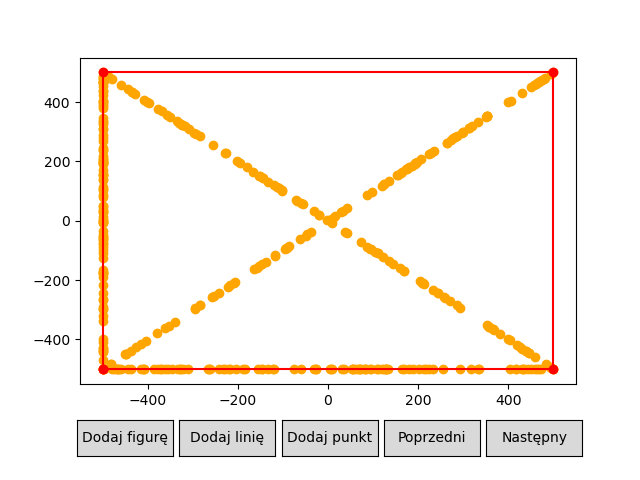

time: 0.009001970291137695 s


In [43]:
%matplotlib notebook
hullPoints, scenes, t = Graham(dataset)
plot = Plot(scenes)
plot.draw()
print("time:",t,"s")
tt[1] = t
ph[1] = len(hullPoints)

<IPython.core.display.Javascript object>


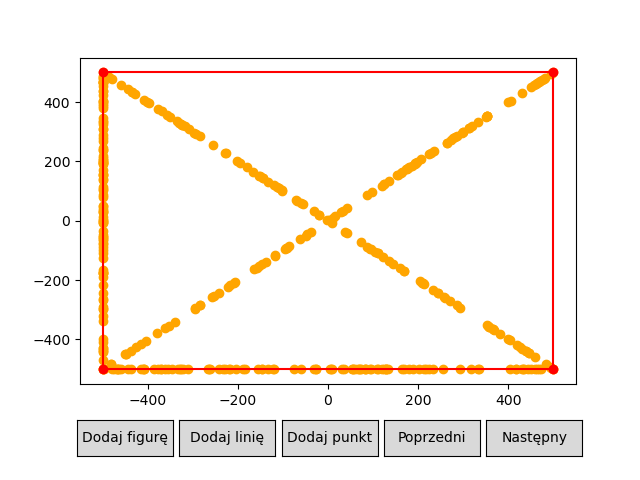

time: 0.0019998550415039062 s


In [44]:
%matplotlib notebook
hullPoints, scenes, t = Jarvis(dataset)
plot = Plot(scenes)
plot.draw()
print("time:",t,"s")
tt[2] = t
times.append(tt)
ph[2] = len(hullPoints)
pointsInHull.append(ph)
    

Porównanie wydajnosci

In [45]:
import pprint
print("points in hull")
pprint.pprint(pointsInHull)
print()
print("times")
pprint.pprint(times)

points in hull
[['a', 12, 12],
 ['b', 100, 99],
 ['c', 8, 15],
 ['d', 5, 4],
 ['am', 17, 17],
 ['bm', 100, 99],
 ['cm', 8, 23],
 ['dm', 5, 4]]

times
[['a', 0.10700011253356934, 0.0009996891021728516],
 ['b', 0.08900022506713867, 0.010001182556152344],
 ['c', 0.007000446319580078, 0.0009996891021728516],
 ['d', 0.001999378204345703, 0.0009999275207519531],
 ['am', 0.20600271224975586, 0.007999658584594727],
 ['bm', 0.08449864387512207, 0.011998653411865234],
 ['cm', 0.014999151229858398, 0.0060024261474609375],
 ['dm', 0.009001970291137695, 0.0019998550415039062]]


In [46]:
def performanceTest(dataset, e = 10**-6):
    h1, _, tG = Graham(dataset, visualize=False, e = e)
    print("Graham:",round(tG,2),"s")
    h2, _, tJ = Jarvis(dataset, visualize=False, e = e)
    print("Jarvis:",round(tJ,2),"s")
    print("%faster",round(((max(tG, tJ)/min(tG, tJ)) - 1) * 100, 1),"%")
    print()
    return (tG, tJ), (len(h1), len(h2))

In [47]:
def runTests(Aset, Bset, Cset, Dset, e = 10**-5):
    print("e:",e)
    print("dataset a")
    ra, ha = performanceTest(Aset, e = e)

    print("dataset b")
    rb, hb = performanceTest(Bset)

    print("dataset c")
    rc, hc = performanceTest(Cset, e = e)

    print("dataset d")
    rd, hd = performanceTest(Dset, e = e)
    return ra, rb, rc, rd, ha, hb, hc, hd

In [48]:
def generateSets():
    Aset = aDataset(cords = (-10**6, 10**6), n=500000, name = "AA")
    Bset = bDataset(n=5000, r = 1000, name = "BB")
    k = 5000
    Cset = cDataset(n=200000, ll = (-k,-k), ur = (k,k), lr = (k,-k), ul = (-k,k), name = "CC")
    Dset = dDataset(ur = (k, k), n1 = 100000, n2 = 100000, name = "DD")
    return Aset, Bset, Cset, Dset

In [49]:
runTests(A,B,C,D)

e: 1e-05
dataset a
Graham: 8.7 s
Jarvis: 12.4 s
%faster 42.6 %

dataset b
Graham: 0.05 s
Jarvis: 9.9 s
%faster 17894.6 %

dataset c
Graham: 1.91 s
Jarvis: 3.96 s
%faster 108.1 %

dataset d
Graham: 14.1 s
Jarvis: 1.85 s
%faster 662.9 %



((8.698907613754272, 12.401999235153198),
 (0.05499982833862305, 9.89699912071228),
 (1.9050004482269287, 3.964001178741455),
 (14.097999811172485, 1.8480074405670166),
 (31, 31),
 (4905, 4948),
 (8, 50),
 (5, 4))